HPCA(WT) vs. HPCA(N75K)
=======================
Multiple or long stimulations

In [1]:
import numpy as np
from numpy import ma
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

from skimage.util import montage
from skimage.filters import rank
from skimage import morphology
from skimage import exposure
from skimage import measure
from skimage import filters
from skimage import io

from scipy import ndimage as ndi
from scipy import signal
from scipy import stats

from domb.reg_type import wf_x2_m2 as wf
from domb.fret.e_fret.e_app import Eapp
from domb.red_green import wt_vs_mut_multistim
from domb.utils import plot
from domb.utils.plot import CMaps
from domb.utils import masking

__HPCA(WT)-ECFP + HPCA(N75K)-EYFP__ (60 fr. 0.5 Hz)

- 23_10_12_01: 20 s __>100 ms<__ 50 s __>500 ms<__ 50 s

- 23_10_12_02: 20 s __>100 ms<__ 50 s __>500 ms<__ 50 s

- 23_10_12_03: 20 s __>500 ms<__ 50 s __>750 ms<__ 50 s

__HPCA(WT)-TagRFP + HPCA(N75K)-EYFP__ (60 fr. 0.5 Hz)

- 23_10_12_04: 20 s __>100 ms<__ 50 s __>500 ms<__ 50 s

- 23_10_12_05: 20 s __>100 ms<__ 50 s __>500 ms<__ 50 s

- 23_10_12_06: 20 s __>500 ms<__ 50 s __>1000 ms<__ 50 s

- 23_10_12_07: 20 s __>500 ms<__ 50 s __>1000 ms<__ 50 s

__HPCA(WT)-TagRFP + HPCA(N75K)-EYFP__

- 23_10_27_01: 20" \|__<60"__ \|60" _(10 fr.\|30 fr.\|30 fr.)_

- 23_10_27_02: 20" \|__<60"__ \|60" _(10 fr.\|30 fr.\|30 fr.)_

- 23_10_27_03: 20" \|__<2"__ 58"\| \|__<1"__ 59"\| \|__<0.5"__ 59.5"\| _(10 fr.\|30 fr.\|30 fr.\|30 fr.)_

- 23_10_27_04: 50" \|__<2"__ 98"\| \|__<20"__ 80"\| \|__<2"__ 98"\| _(10 fr.\|20 fr.\|20 fr.\|20 fr.)_

- 23_10_27_05: 20" \|__<1"<__ 59"\| \|__<5"__ 55"\| \|__<10"__ 50"\| \|__<1"__ 59"\| _(4 fr.\|12 fr.\|12 fr.\|12 fr.\|12 fr.)_

- 23_10_27_06: 60" __<300"__ 300" _(6 fr.\|30 fr.\|30 fr.)_

__HPCA(WT)-ECFP + HPCA(N75K)-EYFP__

- 23_10_28_01: 60" __<300"__ 300" _(6 fr.\|30 fr.\|30 fr.)_

- 23_10_28_02: 60" __<300"__ 300" _(6 fr.\|30 fr.\|30 fr.)_

- 23_10_28_03: 20" \|__<2"__ 58"\| \|__<1"__ 59"\| \|__<0.5"__ 59.5"\| _(10 fr.\|30 fr.\|30 fr.\|30 fr.)_

- 23_10_28_04: 20" \|__<2"__ 58"\| \|__<1"__ 59"\| \|__<0.5"__ 59.5"\| _(10 fr.\|30 fr.\|30 fr.\|30 fr.)_

__HPCA(WT)-TagRFP + HPCA(N75K)-EYFP__

- 23_11_2_01: 100 fr. 0.5 Hz (200"), no application

- 23_11_2_02: 100 fr. 0.5 Hz (200"), no application

- 23_11_2_03: 20" \|__<2"__ 58"\| \|__<1"__ 59"\| \|__<0.5"__ 59.5"\| _(10 fr.\|30 fr.\|30 fr.\|30 fr.)_

- 23_11_2_04: 20" \|__<2"__ 58"\| \|__<1"__ 59"\| \|__<0.5"__ 59.5"\| _(10 fr.\|30 fr.\|30 fr.\|30 fr.)_

- 23_11_2_05: 20" \|__<10"__ 50"\| \|__<5"__ 55"\| \|__<2"__ 58"\| _(10 fr.\|30 fr.\|30 fr.\|30 fr.)_

- 23_11_2_06: 66 fr. 0.1 Hz (660"), no application

- 23_11_2_07: 60" __<300"__ 300" _(6 fr.\|30 fr.\|30 fr.)_

- 23_11_2_08: 300" __<300"__ 300" _(30 fr.\|30 fr.\|30 fr.)_

In [ ]:
reg_path = 'data/wt_vs_mut/23_11_28_08.tif'
reg_name = reg_path.split('/')[-1]
reg_name = reg_name.split('.')[0]

# fp1-CFP(1), fp2-YFP(3) or fp1-RFP(3), fp2-YFP(0)
reg = wf(img_path=reg_path, img_name=reg_name, ch_order={'fp1':3,'fp2':1}, use_gauss=True, gauss_sigma=1, border_crop=20,  # regtype parameters
         proc_sigma=1.5, win_size=801, k_val=1e-5, r_val=0.5,    # processes masking parameters
         soma_mask=False, soma_th=.5, soma_ext=50,
         proc_ext=5,
         select_largest_mask=True)

reg.ch_pic()
# reg.processes_mask_pic()

## RG

In [ ]:
reg_RG = wt_vs_mut_multistim(wt_img=reg.fp1_img_corr, mut_img=reg.fp2_img_corr,
                             narrow_proc_mask=reg.narrow_proc_mask, proc_mask=reg.proc_mask,
                             sd_tolerance=10, stim_list=[9], base_frames=2, stim_win=2, stim_shift=1)  # up mask calc parameters
reg_RG.diff_img_pic()
reg_RG.mask_diff_pic()

# for 2/1/0.5 - [9,39,69]
# for 10/5/2 - [13,41,69]
# for 60 - [35]
# for 300 - [34]11
# for 0.1/0.5 - [10, 35]

## REPORT IMG

In [31]:
from skimage import io
from domb.utils import masking

wt_img = io.imread('/home/wisstock/bio_data/chemLTD/Shurik_series/Cell4/Fluorescence 435nm.tif')
wt_mask = masking.proc_mask(np.mean(wt_img, axis=0), proc_sigma=1.5, win_size=801, k_val=1e-5, r_val=0.5,    # processes masking parameters
         soma_mask=False, soma_th=.5, soma_ext=50,
         proc_ext=5,
         select_largest_mask=True)
wt_narrow_mask = masking.proc_mask(np.mean(wt_img, axis=0), proc_sigma=1.5, win_size=801, k_val=1e-5, r_val=0.5,    # processes masking parameters
         soma_mask=False, soma_th=.5, soma_ext=50,
         ext_fin_mask=False)

mut_img = io.imread('/home/wisstock/bio_data/chemLTD/Shurik_series/Cell4/Fluorescence 505nm.tif')

reg_RG = wt_vs_mut_multistim(wt_img=wt_img, mut_img=mut_img,
                             narrow_proc_mask=wt_narrow_mask, proc_mask=wt_mask,
                             sd_tolerance=10, stim_list=[3], base_frames=2, stim_win=2, stim_shift=2) 

/home/wisstock/anaconda3/envs/domb/lib/python3.9/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/wisstock/anaconda3/envs/domb/lib/python3.9/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/wisstock/anaconda3/envs/domb/lib/python3.9/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[[[1, 3], [5, 7]]]
[[[1, 3], [5, 7]]]


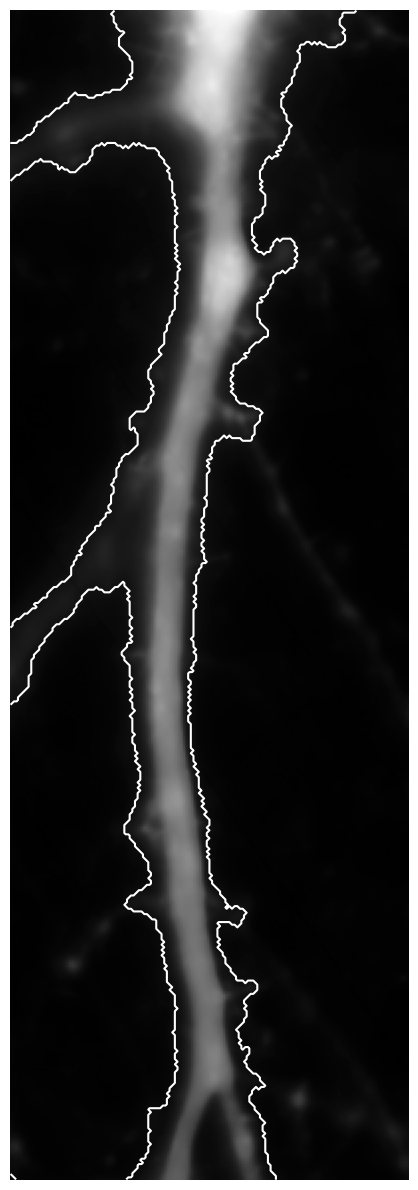

In [88]:
from skimage import transform

tform = transform.SimilarityTransform(scale=1, rotation=0.6, translation=(240, -200))

cell_contour = measure.find_contours(transform.warp(reg_RG.proc_mask, tform)[40:,300:450], level=0.5)
# cell_contour = measure.find_contours(reg_RG.proc_mask[70:400,300:510], level=0.5)

wt_aip = np.mean(reg_RG.wt_img, axis=0)  # [70:400,300:510]
wt_aip = transform.warp(wt_aip, tform)[40:,300:450]

fig = plt.figure(figsize=(4.4,12))
ax = fig.add_subplot()
ax.imshow(wt_aip * -1, cmap='Greys')
for ce_c in cell_contour:
    ax.plot(ce_c[:, 1], ce_c[:, 0], linewidth=1.5, color='w')
ax.axis('off')
plt.tight_layout()
# plt.show()
plt.savefig('cell4_ctrl.png', dpi=300)

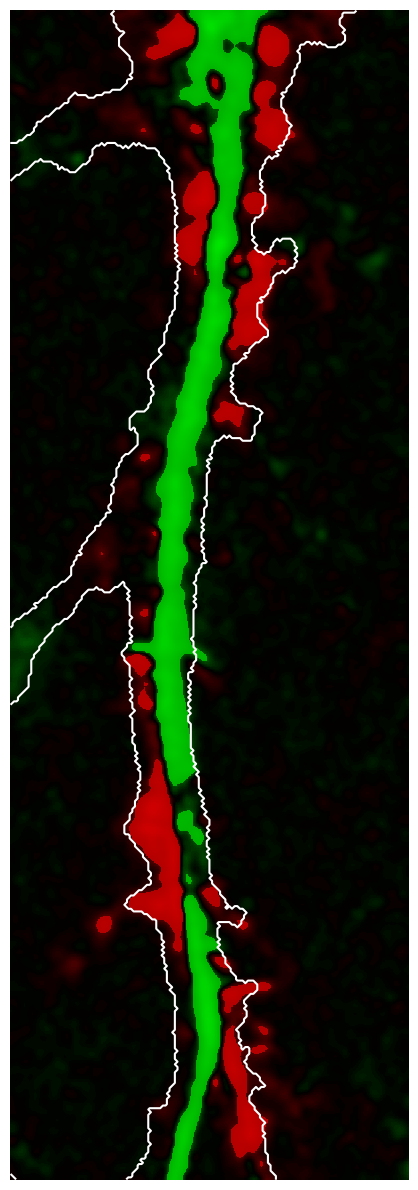

In [86]:
wt_img = transform.warp(reg_RG.wt_diff_img_list[0], tform)[40:,300:450]
mut_img = transform.warp(reg_RG.mut_diff_img_list[0], tform)[40:,300:450]

fig = plt.figure(figsize=(4.4,12))
ax = fig.add_subplot()
ax.imshow(wt_img, cmap=plot.CMaps().cmap_red_green, vmax=1, vmin=-1)
for ce_c in cell_contour:
    ax.plot(ce_c[:, 1], ce_c[:, 0], linewidth=1.5, color='w')
ax.axis('off')
plt.tight_layout()
# plt.show()
plt.savefig('cell4_wt.png', dpi=300)

3898 1242 0.31862493586454593


/home/wisstock/bio/scripts/domb-tools/src/domb/utils/plot.py:117: RuntimeWarning: invalid value encountered in divide
  b_norm_img = (b_img - np.min(b_img)) / (np.max(b_img) - np.min(b_img)).astype(np.uint8)
/home/wisstock/anaconda3/envs/domb/lib/python3.9/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


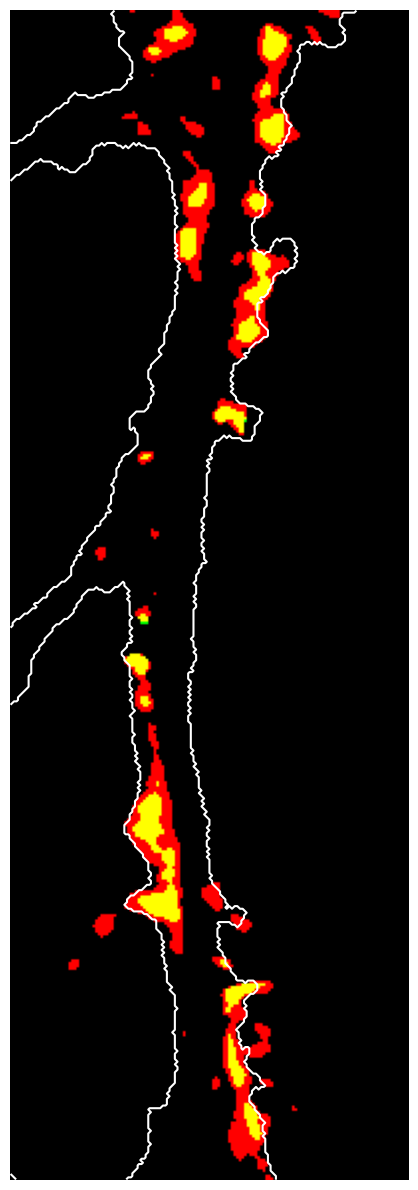

In [87]:
wt_mask_a = wt_img > 0.075
mut_mask_a = mut_img > 0.075

a = np.sum(wt_mask_a)
b = np.sum(mut_mask_a)
c = b/a
print(a, b, c)

mask_overlay = plot.toRGB(r_img=wt_mask_a,
                          g_img=mut_mask_a,
                          b_img=np.zeros_like(wt_mask_a))

fig = plt.figure(figsize=(4.4,12))
ax = fig.add_subplot()
ax.imshow(mask_overlay)
for ce_c in cell_contour:
    ax.plot(ce_c[:, 1], ce_c[:, 0], linewidth=1.5, color='w')
ax.axis('off')
plt.tight_layout()
# plt.show()
plt.savefig('cell4_mask.png', dpi=300)

## Profiles

### WT

In [ ]:
fp1_df_wt_prof_list = []

for stim_i in range(reg_RG.wt_up_mask_list.shape[0]):
    fp1_df_prof,_ = masking.label_prof_arr(input_label=reg_RG.wt_up_label_list[stim_i],
                                           input_img_series=reg.fp1_img,
                                           f0_win=5)
    fp1_df_wt_prof_list.append(fp1_df_prof)

In [ ]:
plot.overlay_line_plot(fp1_df_wt_prof_list[0], min_amp=0, max_amp=1,
                        t_scale=2,
                        app_bar_dict={1:[19,79]}, show_app_bars=True,
                        stim_t=[19,79], show_stim=True,
                        x_lab='Time, s',
                        y_lab='dF/F',
                        plot_title=f'{reg_name} WT (WT mask)',
                        figsize=(12,5))

In [ ]:
plot.stat_line_plot(arr_list=fp1_df_wt_prof_list,
                    lab_list=list(range(1, len(fp1_df_wt_prof_list)+1)),
                    stat_method='se',
                    t_scale=2,
                        app_bar_dict={1:[19,79]}, show_app_bars=True,
                        stim_t=[19,79], show_stim=True,
                    x_lab='Time, s',
                    y_lab='dF/F',
                    plot_title=f'{reg_name} WT (WT mask)',
                    figsize=(12,5))

### Mut.

In [ ]:
fp2_df_prof_list = []

for stim_i in range(reg_RG.wt_up_mask_list.shape[0]):
    fp2_df_prof,_ = masking.label_prof_arr(input_label=reg_RG.mut_up_label_list[stim_i],
                                           input_img_series=reg.fp2_img_corr,
                                           f0_win=3)
    fp2_df_prof_list.append(fp2_df_prof)

In [ ]:
plot.overlay_line_plot(fp2_df_prof_list[0], min_amp=0.1, max_amp=0.2,
                        t_scale=10,
                        app_bar_dict={1:[58,358]}, show_app_bars=True,
                        stim_t=[58,358], show_stim=True,
                        x_lab='Time, s',
                        y_lab='dF/F',
                        plot_title=reg_name,
                        figsize=(12,5))

In [ ]:
plot.stat_line_plot(arr_list=fp2_df_prof_list,
                    lab_list=list(range(1, len(fp2_df_prof_list)+1)),
                    stat_method='se',
                    t_scale=10,
                        app_bar_dict={1:[58,358]}, show_app_bars=True,
                        stim_t=[58,358], show_stim=True,
                    x_lab='Time, s',
                    y_lab='dF/F',
                    plot_title=f'{reg_name}, N75K',
                    figsize=(12,5))

### WT vs. Mut. last stim

In [ ]:
plot.stat_line_plot(arr_list=[fp1_df_wt_prof_list[0], fp2_df_prof_list[0]],
                    lab_list=['WT', 'Mut'],
                    stat_method='se',
                    t_scale=2,
                        app_bar_dict={1:[18,20],2:[78,79],3:[138,138.5]}, show_app_bars=True,
                        stim_t=[18,20,78,79,138,138.5], show_stim=True,
                    x_lab='Time, s',
                    y_lab='dF/F',
                    plot_title=f'{reg_name}, selected stim.',
                    figsize=(12,5))